<hr/>

# Data Mining [EN.550.436]
**Tamás Budavári** - budavari@jhu.edu <br/>
**Class 18** - November 7, 2016

- Introduction to spectral embedding and spectral clustering

<hr/>

<h1><font color="darkblue">Spectral Methods</font></h1>

## Graph

- Represent connections between objects

> **Vertex**: a node of the graph <br>
> **Edge**: a link between two nodes 

- A graph consists of a set of vertices and a set of edges

>$ G\,(V,E) $

## Similarity Graph

- Connect similar objects in a dataset

> Measure of similarity of the edges




In [4]:
class vert(object):#定义点对象
    def __init__(self,data=None):
        self.data = data

class edge(object):#定义边对象,w为长度
    def __init__(self, A, B, w=1):
        self.A, self.B = A, B
        self.w = w
        
V = [ vert('zero'), vert('one'), vert('two'), #点对象集
      vert('three'), vert('four') ] 

E = [ edge(V[0],V[1]), edge(V[0],V[2]), edge(V[0],V[3]), #边对象集
      edge(V[1],V[3]),
      edge(V[2],V[3]), edge(V[2],V[4]), 
      edge(V[3],V[4]) ]

for e in E: 
    print e.A.data, '\t--<%.1f>--\t' % e.w, e.B.data #sides and weights

zero 	--<1.0>--	one
zero 	--<1.0>--	two
zero 	--<1.0>--	three
one 	--<1.0>--	three
two 	--<1.0>--	three
two 	--<1.0>--	four
three 	--<1.0>--	four


## Adjacency Matrix

- Are two vertices connected?

> Encode it in a $(n\!\times\!n)$ **matrix** $A$

- The matrix elements

>$ a_{ij} = \left\{ \begin{array}{ll}
         1 & \mbox{if $i$ and $j$ are connected}\\
         0 & \mbox{otherwise}\end{array} \right.  $
         
- Symmetric matrix
         

### For example

- The previous case becomes 

>$ A = \left( \begin{array}{ccc}
0 & 1 & 1 & 1 & 0  \\
1 & 0 & 0 & 1 & 0  \\
1 & 0 & 0 & 1 & 1  \\
1 & 1 & 1 & 0 & 1  \\
0 & 0 & 1 & 1 & 0  \\
\end{array} \right)$

## Spectral Clustering

- How to cut the graph into pieces with minimal "damage"

<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/c/c0/Min_cut_example.svg/330px-Min_cut_example.svg.png align=left width=220>



## Graph Laplacian

- Degree matrix $D$ is diagonal matrix formed from the sum of all edges

>$\displaystyle d_{ii} = \sum_j^n a_{ij} $

- The graph Laplacian

>$ L = D - A$

- What's so special abou this?!

## An Interesting Property

- For any $x$, the bilinear expression $x^T L\,x $ has a familiar formula

>$\displaystyle x^T L\,x = \sum_{i}^n d_{ii} x_i^2 - \sum_{i,j}^n  a_{ij}\,x_i x_j $

>$\displaystyle \hspace{0.5in} = \frac{1}{2} \left\{ \sum_{i}^n d_{ii} x_i^2 - 2\sum_{i,j}^n  a_{ij}\,x_i x_j  + \sum_{j}^n d_{jj} x_j^2 \right\}$

>$\displaystyle  \hspace{0.5in} = \frac{1}{2} \left\{ \sum_{i,j}^n a_{ij} x_i^2 - 2\sum_{i,j}^n  a_{ij}\,x_i x_j  + \sum_{i,j}^n a_{ij} x_j^2 \right\}$

>$\displaystyle  \hspace{0.5in} = \frac{1}{2}\sum_{i,j}^n a_{ij}\,(x_i\!-\!x_j)^2 $


- Which is


>$\displaystyle x^T L\,x = \frac{1}{2}\sum_{i,j}^n a_{ij}\,(x_i\!-\!x_j)^2 = $ $\displaystyle \frac{1}{2}\sum_{(i,j)\in{}E} (x_i\!-\!x_j)^2$

## Weighted Edges

- Instead of $A$ we can use a weight matrix $W$

>$ L = D - W$ 

> where $D$ has diagonal elements

>$\displaystyle d_{ii} = \sum_j w_{ij}$

- And the result is again 

>$\displaystyle x^T L\,x = \frac{1}{2}\sum_{i,j}^n w_{ij}\,(x_i\!-\!x_j)^2 = $ $\displaystyle \frac{1}{2}\sum_{(i,j)\in{}E} w_{ij}\,(x_i\!-\!x_j)^2$

## Minimization

- Solution: the smallest eigenvalues of $L$ and corresponding eigenvectors

> The 1st eigenvector is the trivial solution (constant) <br>
> We use the 2nd eigenvector, and so on...

- Laplacian eigenmaps

> Different similarity matrices to start with<br>
> Different normalizations


## Variants

 - Simple Laplacian
 
 >$ L = D-W$
 
 - Normalized Laplacian
 
 >$ L_N = D^{-1/2}\,L\,D^{-1/2} = I -  D^{-1/2}\,W\,D^{-1/2}$
 
 - Relaxed Laplacian
 
 >$ L_{\rho} = L - \rho D$
 
 - Beltrami, etc...

## Demo from Scratch

In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


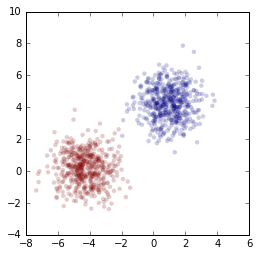

In [8]:
from sklearn import datasets
np.random.seed(3)

X, C = datasets.make_blobs(n_samples=1000, centers=2)#生成点

figure(); #初始化图
subplot(111,aspect='equal'); #画一个小图
scatter(X[:,0], X[:,1], c=C, alpha=0.2, edgecolor='none');#color可以是类别向量

(1000L, 2L) (1L, 1000L, 2L) (1000L, 1L, 2L)
(1000L, 1000L, 2L)
(1000L, 1000L)
Symmetric? True


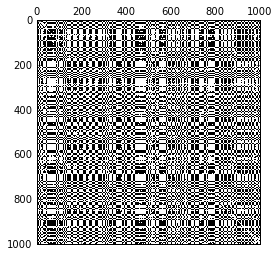

In [17]:
# Simple adjacency matrix based on distance threshold
m1 = X[np.newaxis, :, :]#制定维度上加条线
m2 = X[:, np.newaxis, :]
print X.shape, m1.shape, m2.shape
d = m1 - m2
print d.shape#运算时，维度转化一致
d *= d
r2 = d.sum(axis=2)#按第三维加起来
print r2.shape
A = (r2>1e-15) & (r2<9)
A = A.astype(np.float)#转化数据类型
print 'Symmetric?', np.allclose(A,A.T)#看A是否对称
spy(A);#1 黑， 0 白
#计算邻近矩阵

-4.05421522306e-13 2.51045552984 (1000L,) (1000L, 1000L)


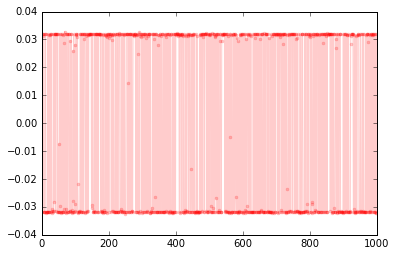

In [24]:
D = A.sum(axis=0)#按行加总
D = diag(D)#向量生成对角阵

L = D - A#Laplacian

w, v = linalg.eigh(L)   #ascending order w,v每列是一个正交化的特征向量


print w[0], w[1], w.shape, v.shape
#plot(w)

figure()
plot(v[:,1], '.-r', alpha=0.2);

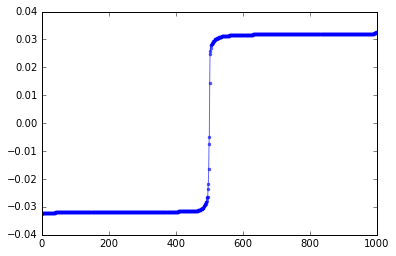

In [15]:
s = argsort(v[:,1])   #排序,得序号向量
plot(v[s,1], '.-b', alpha=0.6);#把特征向量的元素值按升序画出来
#s

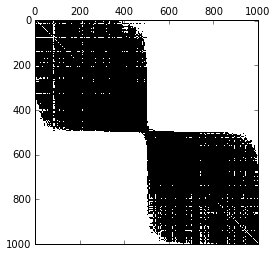

In [7]:
i,j = meshgrid(s,s) #有潜在升序编号的网格
spy(A[i,j]);#单从每个维度看都是升序的

### Exercise

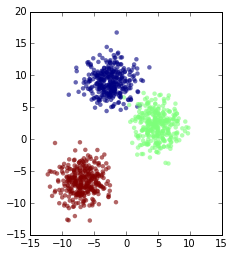

In [16]:
from sklearn import datasets

np.random.seed(42) # try other seeds, e.g., 0
X, C = datasets.make_blobs(n_samples=1000, centers=3, cluster_std=2)#产生集群点

figure();
subplot(111,aspect='equal'); #画一个小图的套路
scatter(X[:,0], X[:,1], c=C, alpha=0.6, edgecolor='none');

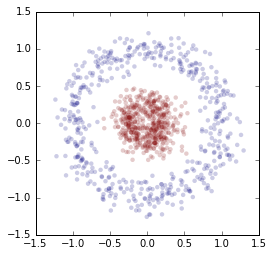

In [33]:
np.random.seed(45)#another seed
X, C = datasets.make_circles(n_samples=1000,factor=0.25, noise=0.12)#产生圆形数据集,默认两个同心类

subplot(111,aspect='equal'); scatter(X[:,0],X[:,1],c=C, alpha=0.2,edgecolor='none');

In [8]:
abb=array((1,2,3))
abb[abb<0]

array([], dtype=int32)